In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install -U py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.4 MB/s eta 0:00:00
     ━━━

In [2]:
from datasets import load_dataset

In [3]:
data_files={"test":'3.0.0/test-00000-of-00001.parquet','train':"3.0.0/train-00002-of-00003.parquet",'valudation':"3.0.0/validation-00000-of-00001.parquet"}
dataset = load_dataset("cnn_dailymail",data_files=data_files,version='3.0.0')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
dataset

DatasetDict({
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 95704
    })
    valudation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
})

In [5]:
dataset["train"][0]['article']

"A woman who was glassed by a stranger has released pictures of her injuries in a fury after her attacker walked free from court. Caitlin Morrell, 21, was on a night out with a friend when Stephanie Murfet thrust a glass tumbler into her face. Murfet, 22, was handed a suspended jail sentence at Cambridge Crown Court. Caitlin Morrell, 21, was enjoying a night out in Ely with a friend when Stephanie Murfet, 22, (right) described by bar staff as 'the short, frumpy one', pushed a tumbler in her face, leaving a deep gash beside her nose, right . But Miss Morrell, who has a scar across her cheek, said she showed no remorse. She said: ‘She walked out past the public gallery and that’s the first time I’d seen her since she glassed me. She didn’t look at me but she was smiling. That made my blood boil.’ She added that she ‘felt like her brain had exploded’ in the attack at the Townhouse pub in Ely on February 22. Miss Morrell had had an altercation with a friend who had started seeing her ex. S

In [6]:
dataset["train"][0]['highlights']

"Caitlin Morrell, 21, was on night out in Ely with friend when she was glassed .\nHairdresser said shorter woman she didn't know thrust tumbler in her face .\nThe short woman was Stephanie Murfet, 22, from Littleport, Cambridgeshire .\nAttack left a deep cut and three-inch scar, and left Miss Morrell traumatised .\nMurfet admitted causing ABH but was let off with suspended sentence .\nAlso also given community order and told to pay compensation and costs .\nMiss Morrell, of Ely, is now back at work for Toni and Guy in Cambridge ."

In [7]:
from transformers import pipeline

pipe = pipeline("text-generation",model='gpt2-medium')

In [8]:
#text summarization

In [9]:
dataset['train'][1]['article']


"This is the 'incredible' moment humpback dolphins were caught on camera\xa0strand-feeding in Australia for the first time. The footage was caught by marine researcher Dr Daniele Cagnazzi and his team as part of a long running study by Southern Cross University. It shows the dolphin beaching itself on a mud bank to catch fish which have been washed up from the river. Dr Cagnazzi said it was large splashes in the distance that attracted the team's attention to the rare behaviour. This is the first time footage showing humpback dolphins strand-feeding in the estuary on the Fitzroy River . Professor Peter Harrison from Southern Cross Univesity said the event was 'significant' This amazing image shows a group of dolphins strand-feeding is the US . He said: ''We soon realised we were witnessing an incredible event. The humpback dolphins were observed swimming a few metres away from and parallel to the shoreline. 'This behaviour probably allows dolphins to concentrate fish against the mud ba

In [10]:
input_text=dataset['train'][1]['article'][:2000]
query=input_text +"\nTL;DR:\n"
pipe_out=pipe(query,max_length=512,clean_up_tokenization_spaces=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [11]:
pipe_out[0]['generated_text'][len(query):]

'Whales and dolphins strand themselves to catch smaller species of fish on the rivers of Brisbane that wash up on Australian shores.\nWhat is "Pseudobranchiality"?\xa0\nWhales are not the only dolphins that strand themselves. This event is the first in Australia for the longest time.\nPosted by \xa0Danil Cagnazzi at 10:43 AM'

In [12]:
summaries={}
summaries["gpt2-medium-380M"]=pipe_out[0]['generated_text'][len(query):]

In [13]:
# T5 transformers
pipe = pipeline('summarization',model='t5-base')

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [14]:
pipe_out=pipe(input_text)

In [15]:
pipe_out[0]['summary_text']

"the footage was captured by marine researcher Dr Daniele Cagnazzi and his team as part of a long running study . it shows the dolphin beaching itself on a mud bank to catch fish which have been washed up from the river . 'we soon realised we were witnessing an incredible event,' he said ."

In [16]:
summaries["t5-base-223M"]=pipe_out[0]['summary_text']

In [17]:
#Bert-large-cnn model
#pipe=pipeline('summarization',model="facebook/bart-large-cnn")
#pipe_out=pipe(input_text)

In [18]:
#pipe_out[0]['summary_text']

In [19]:
#summaries['bart-large-cnn-400M']=pipe_out[0]['summary_text']

In [20]:
#summaries

In [21]:
# google Pegasus Model
#pipe=pipeline('summarization',model='google/pegasus-cnn_dailymail')

In [22]:
#pipe_out=pipe(input_text)

In [23]:
#pipe_out[0]['summary_text']

In [24]:
#summaries["pegasus-cnn-568M"]=pipe_out[0]['summary_text']

In [25]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print("")

GPT2-MEDIUM-380M
Whales and dolphins strand themselves to catch smaller species of fish on the rivers of Brisbane that wash up on Australian shores.
What is "Pseudobranchiality"? 
Whales are not the only dolphins that strand themselves. This event is the first in Australia for the longest time.
Posted by  Danil Cagnazzi at 10:43 AM

T5-BASE-223M
the footage was captured by marine researcher Dr Daniele Cagnazzi and his team as part of a long running study . it shows the dolphin beaching itself on a mud bank to catch fish which have been washed up from the river . 'we soon realised we were witnessing an incredible event,' he said .



In [3]:
#Fine-Tuning Bert model on Indian News Data for now english only.

from google.colab import drive

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!pwd

/content


In [6]:
%cd /content/drive/MyDrive/NLP project

/content/drive/MyDrive/NLP project


In [7]:
!pwd

/content/drive/MyDrive/NLP project


In [8]:
import pandas as pd


In [9]:
raw_data_train = pd.read_csv("/content/drive/MyDrive/NLP project/Eng_train.csv")

In [10]:
raw_data_val = pd.read_csv("/content/drive/MyDrive/NLP project/Eng_val_article.csv")

In [41]:
raw_data_train.Article[0]

'Logos for MasterCard and Visa credit cards at the entrance of a New York coffee shopIn the latest blow to Russia’s financial system after its invasion of Ukraine, Mastercard and Visa said they are suspending their operations in the country. Mastercard said cards issued by Russian banks will no longer be supported by its network and any Mastercard issued outside the country will not work at Russian stores or ATMs.“We don’t take this decision lightly,” Mastercard said in a statement, adding that it made the move after discussions with customers, partners and governments.Visa said it’s working with clients and partners in Russia to cease all Visa transactions over the coming days.“We are compelled to act following Russia’s unprovoked invasion of Ukraine, and the unacceptable events that we have witnessed,” Visa Chairman and Chief Executive Officer Al Kelly said in a statement.The twin suspensions were announced within 16 minutes of each other, and they followed a private video call earli

In [43]:
raw_data_train.Summary[0]

'Since the invasion of Ukraine, the value of the Russian currency, the ruble, has plunged by more than a third to a record low.'

In [45]:
raw_data_val.head()

,id,Article
0,0e99444b1d4e7b8886582e371a6ce939,Pak PM Imran Khan expresses solidarity with In...
1,adfa04f5e1e7403dd90f5cddd29b6c37,"The Pentagon on Monday, June 18, 2018, formall..."
2,77d978318d3503fc6485c138ae3f3aa2,Taliban fighters patrol in the Wazir Akbar Kha...
3,973c4f387dc9f48e1be58608101bc3d6,A top official of American defence intelligen...
4,cb502ddb99c6a53d46b300027b4fe589,Boris Johnson's advisor under pressure over lo...


In [46]:
raw_data_val.Article[0]

'Pak PM Imran Khan expresses solidarity with India over COVID-19 crisisPakistan Prime Minister Imran Khan on Saturday expressed his solidarity with the people of India amid the "dangerous" second wave of COVID-19, adding that "we must fight this global challenge confronting humanity together"."I want to express our solidarity with people of India as they battle a dangerous wave of #COVID19. Our prayers for speedy recovery go to all those suffering from pandemic in our neighbourhood and world," tweeted Mr Khan."We must fight this global challenge confronting humanity together," he added.Pakistan Foreign Minister Shah Mahmood Qureshi also expressed support to the people of India and said the COVID-19 crisis is yet another reminder that humanitarian issues require responses beyond political consideration."We express our support to the people of India in the wake of the current wave of #COVID19 infections that has hit our region hard. On behalf of the people of Pakistan, I extend our heart

In [48]:
#train data Preprocessing
raw_data_train.columns

Index(['id', 'Link', 'Heading', 'Summary', 'Article'], dtype='object')

In [58]:
raw_data_train.Heading[50]

'China destroyed live COVID-19 samples instead of sharing them: Pompeo'

In [60]:
raw_data_train.Summary[50]

'US Secretary of State Mike Pompeo on Wednesday accused China of destroying live COVID-19 samples instead of sharing them and said that America stands with over 120 nations, including Australia, who have taken up the American call for an inquiry into the origins of the virus.'

In [59]:
raw_data_train.Article[50]

"China destroyed live COVID-19 samples instead of sharing them: PompeoUS Secretary of State Mike Pompeo on Wednesday accused China of destroying live COVID-19 samples instead of sharing them and said that America stands with over 120 nations, including Australia, who have taken up the American call for an inquiry into the origins of the virus.China banned beef exports and levied 80 per cent tariffs on barley from Australia as the country supported international call for an investigation into the pandemic that has claimed over 324,000 lives in the world and infected over 4.9 million people worldwide.Pompeo said that China threatened Australia with economic retribution for the simple act of asking for an independent inquiry into the origins of the virus.“That's not right. We stand with Australia and the more than 120 nations now who have taken up the American call for an inquiry into the origins of the virus, we can understand what went wrong and save lives now and in the future,” Pompeo

In [11]:
train_data=raw_data_train.rename({'Article':"dialogue",'Summary':"summary"},axis=1)

In [12]:
train_data=train_data[['id','dialogue','summary']]

In [13]:
train_data['dialogue']=train_data.dialogue.astype("string")

In [14]:
train_data['summary']=train_data.summary.astype("string")

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12565 non-null  object
 1   dialogue  12565 non-null  string
 2   summary   12565 non-null  string
dtypes: object(1), string(2)
memory usage: 294.6+ KB


In [113]:
len("China death toll mounts to 2000 due to Coronavirus outbreakThe death toll due to Coronavirus has surged\xa0to 2,000, in China, according to the government. However, new virus cases in the country has recorded a decline for the second consecutive day.1,749 new infections and 136 new deaths were caused due to Coronavirus\xa0after China’s leader said disease prevention and control was at “a critical time.”J\u200b\u200bapan also confirmed more infections of the new coronavirus on the Diamond Princess cruise ship, bringing the total to 542 people among the 3,700 crew and passengers initially on board. The infections have led to heavy criticism of the decision to quarantine passengers on the vessel. The quarantine ends later Wednesday.The updated figures on the COVID-19 illness for mainland China bring the total for cases to 74,185 and deaths to 2,004. New cases have fallen to under 2,000 daily for the past two days.Chinese President Xi Jinping spoke about the efforts to control the outbreak in a phone call with British Prime Minister Boris Johnson described in state media.Separately, the U.N. secretary general told The Associated Press that the virus outbreak “is not out of control but it is a very dangerous situation.” Antonio Guterres said in an interview in Lahore, Pakistan, that “the risks are enormous and we need to be prepared worldwide for that.”China has locked down several cities in central Hubei province where the outbreak hit hardest, halting nearly all transportation and movement except for the quarantine efforts, medical care and delivery of food and basic necessities.China also may postpone its biggest political meeting of the year, the annual congress due to start in March, to avoid having people travel to Beijing while the virus is still spreading. One of the automotive industry’s biggest events, China’s biannual auto show, was postponed, and many sports and entertainment events have been delayed or canceled.(With inputs from AP)ALSO READ:\xa0Coronavirus may hit production schedules in India & UK, warns Tata JLRALSO READ:\xa0Coronavirus can now hit your computer: Here\'s how")

2099

In [16]:
train_data.dialogue[998]=train_data.dialogue[998][:2099]

In [19]:
train_data.head()

,id,dialogue,summary
0,3938f547c863630032649c54e611e6b0,Logos for MasterCard and Visa credit cards at ...,"Since the invasion of Ukraine, the value of th..."
1,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...
2,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...
3,82cce3b894007faf93e567d751dd2aef,The Sikh community of Pakistan has urged India...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...
4,4b3bbf58136527fff41adc6c2f37d73d,Armed police at the scene of an incident on Lo...,"The Police said the attacker, Usman Khan, was ..."


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
X = list(train_data["dialogue"])
y = list(train_data["summary"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

NameError: name 'tokenizer' is not defined

In [152]:
dataset

DatasetDict({
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 95704
    })
    valudation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
})

In [164]:
dataset["train"][0]['article']

"A woman who was glassed by a stranger has released pictures of her injuries in a fury after her attacker walked free from court. Caitlin Morrell, 21, was on a night out with a friend when Stephanie Murfet thrust a glass tumbler into her face. Murfet, 22, was handed a suspended jail sentence at Cambridge Crown Court. Caitlin Morrell, 21, was enjoying a night out in Ely with a friend when Stephanie Murfet, 22, (right) described by bar staff as 'the short, frumpy one', pushed a tumbler in her face, leaving a deep gash beside her nose, right . But Miss Morrell, who has a scar across her cheek, said she showed no remorse. She said: ‘She walked out past the public gallery and that’s the first time I’d seen her since she glassed me. She didn’t look at me but she was smiling. That made my blood boil.’ She added that she ‘felt like her brain had exploded’ in the attack at the Townhouse pub in Ely on February 22. Miss Morrell had had an altercation with a friend who had started seeing her ex. S

In [166]:
for n,item in enumerate(final_train):
  dataset["train"][n]['article'] = final_train[n]['dialogue']
  dataset["train"][n]['highlights'] = final_train[n]['summary']

In [169]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [165]:
final_train[0]["dialogue"]

'Logos for MasterCard and Visa credit cards at the entrance of a New York coffee shopIn the latest blow to Russia’s financial system after its invasion of Ukraine, Mastercard and Visa said they are suspending their operations in the country. Mastercard said cards issued by Russian banks will no longer be supported by its network and any Mastercard issued outside the country will not work at Russian stores or ATMs.“We don’t take this decision lightly,” Mastercard said in a statement, adding that it made the move after discussions with customers, partners and governments.Visa said it’s working with clients and partners in Russia to cease all Visa transactions over the coming days.“We are compelled to act following Russia’s unprovoked invasion of Ukraine, and the unacceptable events that we have witnessed,” Visa Chairman and Chief Executive Officer Al Kelly said in a statement.The twin suspensions were announced within 16 minutes of each other, and they followed a private video call earli

In [107]:
counter=0
for i in train_data.dialogue:
  counter=counter+1
  if "5 regions in New York state reopen in phased" in i:
      print(counter)

1000
7558


In [64]:
val_data=raw_data_train.Article

In [17]:
from transformers import AutoModelForSeq2SeqLM,AutoTokenizer

In [18]:
import torch

In [19]:
device='cpu'
model_ckpt="facebook/bart-large-cnn"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)
model=AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [122]:
dialogue_len=[len((x["dialogue"]).split()) for x in final_train]
summary__len=[len((x["summary"]).split()) for x in final_train]

In [125]:
data=pd.DataFrame([dialogue_len,summary__len]).T

In [126]:
data.columns=["Dialogue Length","Summary Lenght"]

In [127]:
data.head()

,Dialogue Length,Summary Lenght
0,460,24
1,293,42
2,472,23
3,289,51
4,1074,47


from matplotlib import pyplot as plt
_df_0['Dialogue Length'].plot(kind='hist', bins=20, title='Dialogue Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Summary Lenght'].plot(kind='hist', bins=20, title='Summary Lenght')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Dialogue Length', y='Summary Lenght', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Dialogue Length'].plot(kind='line', figsize=(8, 4), title='Dialogue Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Summary Lenght'].plot(kind='line', figsize=(8, 4), title='Summary Lenght')
plt.gca().spines[['top', 'right']].set_visible(False)

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Lenght'}>]], dtype=object)

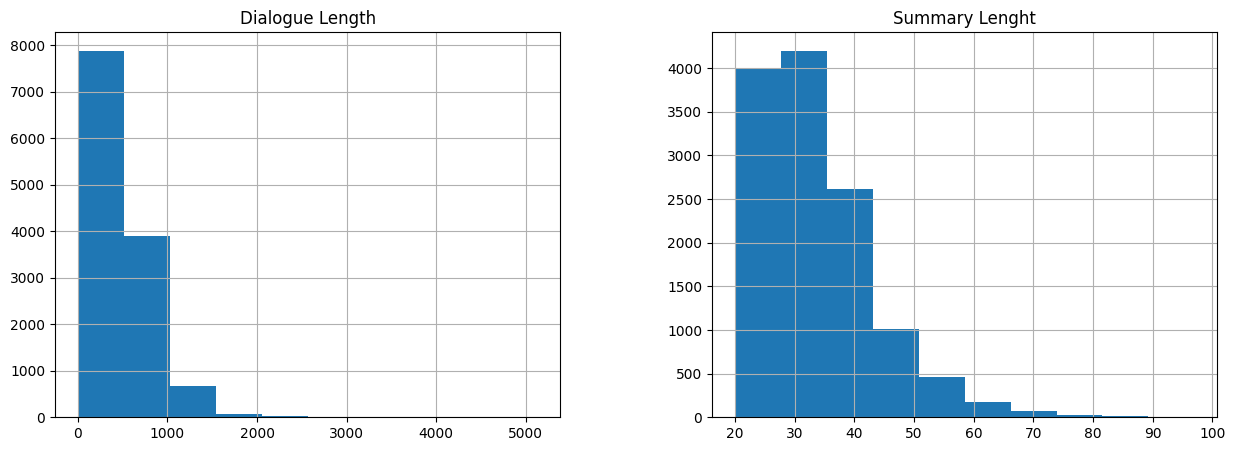

In [131]:
data.hist(figsize=(15,5))

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12565 non-null  object
 1   dialogue  12565 non-null  string
 2   summary   12565 non-null  string
dtypes: object(1), string(2)
memory usage: 294.6+ KB


In [21]:
#tokenize custom data
from sklearn.model_selection import train_test_split
X = list(train_data["dialogue"])
y = list(train_data["summary"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
train_tokenized = tokenizer(X_train,text_target=y_train,
                      max_length=1024,truncation=True)
val_tokenized = tokenizer(X_val,text_target=y_val,
                      max_length=1024,truncation=True)

In [58]:
y_train_tokenized = tokenizer(y_train, padding=True, truncation=True, max_length=1024)
y_val_tokenized = tokenizer(y_val, padding=True, truncation=True, max_length=1024)

In [23]:
type(train_tokenized)

transformers.tokenization_utils_base.BatchEncoding

In [174]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [35]:
type(y_val_tokenized)

transformers.tokenization_utils_base.BatchEncoding

In [175]:
len(X_train),len(X_val)

(10052, 2513)

In [27]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
          item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [28]:
train_dataset = Dataset(train_tokenized)
val_dataset = Dataset(val_tokenized)

In [30]:
val_dataset[0]

{'input_ids': tensor([    0,   133,  2124,   837,    15,   302,  1220,     5,   140,   942,
             7,  1950, 10914,    10,  2020,    15,  1504,     7,     5,   315,
           532,    30,  1196,     9,   411,  2260,  3346,   749,     4,   713,
            16,    45,    10,   507,  2255,    15,     5,  1504,  2020,    35,
         30380,     7,     5,   714,    32, 20058,   149,     5,   752,  4354,
             6,     8,     5, 15060,  1235,  3284,    32,   421,     7,  2178,
            15,    63, 30457,     4, 22816,  9739,   807,   140,    18,    92,
          1504,  2020,    35,  7470,    86,     5, 16426,   116, 20700,   354,
         11166,   478,    30,   807,   140,    17,    27,    29,  1504,  2020,
          3048,  1679,  5491,   807,   140,    18,    92,  1504,  2020,   645,
          5551,  3346,   749,   125,     5,   814,  8711,    14,     5,   239,
           461,   429,  2140,  7244,     5,   665,  1732,     9,     5,  2020,
             6,   585,    30,   270,   

In [31]:
type(train_dataset)

__main__.Dataset

In [32]:
from transformers import DataCollatorForSeq2Seq
data_collator=DataCollatorForSeq2Seq(tokenizer,model=model)

In [33]:
from transformers import TrainingArguments , Trainer

training_args=TrainingArguments(
    output_dir='bart_custom',
    num_train_epochs=1,
    warmup_steps=500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    logging_steps=10,
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

In [34]:
trainer = Trainer(model=model,args=training_args,
                  tokenizer=tokenizer,data_collator=data_collator,
                  train_dataset=train_dataset,eval_dataset=val_dataset)

In [ ]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [132]:
# Data Coletor
def get_feature(batch):
  encodings=tokenizer(batch["dialogue"],text_target=batch["summary"],
                      max_length=1024,truncation=True)
  encodings={"input_ids":encodings['input_ids'],
             'attention_mask':encodings['attention_mask'],
             'labels': encodings['labels']
             }
  return encodings

In [144]:
finetune_pt=final_train.map(get_feature,batched=True)

AttributeError: 'list' object has no attribute 'map'

In [5]:
import json
with open("artifacts/lang_dict.json",'r') as file_obj:
    lang_dict=json.load(file_obj)

In [6]:
lang_dict.keys()

dict_keys(['Arabic', 'Czech', 'German', 'English', 'Spanish', 'Estonian', 'Finnish', 'French', 'Gujarati', 'Hindi', 'Italian', 'Japanese', 'Kazakh', 'Korean', 'Lithuanian', 'Latvian', 'Burmese', 'Nepali', 'Dutch', 'Romanian', 'Russian', 'Sinhala', 'Turkish', 'Vietnamese', 'Chinese', 'Afrikaans', 'Azerbaijani', 'Bengali', 'Persian', 'Hebrew', 'Croatian', 'Indonesian', 'Georgian', 'Khmer', 'Macedonian', 'Malayalam', 'Mongolian', 'Marathi', 'Polish', 'Pashto', 'Portuguese', 'Swedish', 'Swahili', 'Tamil', 'Telugu', 'Thai', 'Tagalog', 'Ukrainian', 'Urdu', 'Xhosa', 'Galician', 'Slovene'])

In [3]:
from transformers import MBartForConditionalGeneration,MBart50TokenizerFast

c:\Users\arup9\anaconda3\envs\cuda_test\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model=MBartForConditionalGeneration.from_pretrained("artifacts/mbart-large-50/")

In [12]:
language_input="Gujarati"
tokenizer=MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt",src_lang=lang_dict[language_input])

In [10]:
news="""વડાપ્રધાન નરેન્દ્ર મોદી રામમંદિર પરિસર પહોંચ્યા હતા. તેઓ સવારે 10.30 વાગ્યે મહર્ષિ વાલ્મીકિ એરપોર્ટ પહોંચ્યા હતા. અહીંથી તેઓ હેલિકોપ્ટર મારફત મંદિર જવા રવાના થયા હતા. અયોધ્યામાં 6 દિવસની ધાર્મિક વિધિઓ પછી ભગવાન રામલલ્લાની સોમવારે 22 જાન્યુઆરીએ રામમંદિરમાં પ્રાણપ્રતિષ્ઠા કરવામાં આવી હતી. RSSના વડા મોહન ભાગવત, પીએમ મોદી સહિત છ મહેમાનોએ પૂજામાં હાજરી આપી હતી. મોદી મુખ્ય યજમાન તરીકે, આછા પીળા રંગની ધોતી અને કુર્તો પહેરીને 12 વાગ્યે મંદિર પરિસરમાં પહોંચ્યા હતા. તેમના હાથમાં એક થાળી હતી, જેમાં શ્રીરામલલ્લાનું ચાંદીનું છત્ર હતું. પ્રાણપ્રતિષ્ઠાની વિધિ બપોરે 12.05 કલાકે શરૂ થઈ હતી, જે એક કલાકથી વધુ સમય સુધી ચાલી હતી.વડાપ્રધાને ભગવાનની આરતી કરી. મુખ્ય પૂજારી સત્યેન્દ્ર દાસનાં ચરણ સ્પર્શ કર્યા. આ પછી તેમણે શ્રીરામલલ્લાની પરિક્રમા કરી અને પ્રણામ કર્યા. તેમણે રામજન્મભૂમિ ટ્રસ્ટના પ્રમુખ મહંત નૃત્ય ગોપાલ દાસના ચરણ સ્પર્શ પણ કર્યા હતા. પીએમએ તેમના 11 દિવસના ઉપવાસ પણ તોડ્યા. પીએમએ લોકોને સંબોધિત કર્યા. પીએમનું 35 મિનિટનું ભાષણ રામ-રામથી શરૂ થયું અને જય સિયારામ સાથે સમાપ્ત થયું. તેમણે દેશવાસીઓને અભિનંદન આપતાં કહ્યું - કંઈક એવું ખૂટતું હતું કે મંદિર બનાવવામાં સદીઓ લાગી. આ રામમંદિર ભારતના ઉદયનું સાક્ષી બનશે. પ્રાણપ્રતિષ્ઠા બાદ રામલલ્લાની આંખો પરથી પટ્ટી હટાવી દેવામાં આવી હતી. ગત સપ્તાહે જ રામમંદિરમાં 51 ઇંચની નવી મૂર્તિ મૂકવામાં આવી હતી. અંતમાં, પીએમએ રામલલ્લાનાં ચરણોમાં પ્રણામ કર્યા. આ પછી મોદીએ અહીં 11 દિવસના ધાર્મિક ઉપવાસ તોડ્યા. નિર્મોહી અખાડાના સ્વામી ગોવિંદગિરિ મહારાજે પીએમ મોદીને ચમચીથી પાણી આપ્યું. માત્ર ત્રણ દિવસના ઉપવાસથી જગ્યાએ 11 દિવસ સુધીની કઠોર સાધના પીએમ મોદીએ કરી હતી ને જ્યારે આ વ્રતનો ઉલ્લેખ નિર્મોહી અખાડાના સ્વામી ગોવિંદગિરિએ જાહેરમાં કર્યો તો પીએમ પણ ભાવુક થઈ ગયા. ત્યાર બાદ મોદી કુબેર ટીલા ગયા હતા. અહીં ભગવાન શિવનો જળાભિષેક કરવામાં આવ્યો હતો. આ દરમિયાન તેઓ મંદિરના નિર્માણ સાથે જોડાયેલા શ્રમિકોને મળ્યા અને તેમના પર ફૂલોની વર્ષા કરી તેમજ જટાયુની પ્રતિમાનું અનાવરણ કર્યું હતું. પીએમ સાંજે અયોધ્યાથી રવાના થઈ ગયા છે. પ્રાણપ્રતિષ્ઠા સમારોહમાં આવેલી હસ્તીઓ હવે રામલલાનાં દર્શન કરવા લાગી હતી. અયોધ્યામાં ભવ્ય પ્રાણપ્રતિષ્ઠા મહોત્સવ દરમિયાન વડાપ્રધાન નરેન્દ્ર મોદીએ રામલલ્લાને દંડવત્ પ્રણામ કર્યા હતા. આ પહેલાં 5 ઓગસ્ટ 2020ના રોજ રામમંદિરનું ભૂમિપૂજન યોજાયું હતું, જેમાં વડાપ્રધાન મોદીએ રામલલ્લાને સાષ્ટાંગ કર્યા હતા અને હવે 900 દિવસ બાદ 22 જાન્યુઆરી 2024ના રોજ રામલલ્લાની પ્રાણપ્રતિષ્ઠા પછી પણ તેમણે દંડવત્ પ્રણામ કર્યા હતા. અયોધ્યાના રામમંદિરમાં સોમવાર, 22 જાન્યુઆરીના રોજ રામલલ્લાની પ્રાણપ્રતિષ્ઠામાં દિગ્ગજ ઉદ્યોગપતિઓ"""

In [14]:
model_inputs=tokenizer(news,return_tensors='pt')
genarated_tokens=model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
)
translation=tokenizer.batch_decode(genarated_tokens,skip_special_tokens=True)

In [15]:
translation[0]

'Prime Minister Narendra Modi attended the Raman Mandir Conference. The meeting was held at 10.30 a.m. on Wageday, the Walki Airport. The meeting was attended by a delegation of the Helicopter Marwat Mandir Governor. The six-day religious delegation of Vojvodina was chaired by Bhagwan Ramlal on 22 January at the Raman Mandir. Vada Mohan Bhagwat of RSS was chairman of the six-member delegation of Vojvodina. Modi was the chief executive of the six-member delegation of Vojvodina. Modi was the chief executive of the six-member delegation of Vojvodina, Ashcha Pella Rangini Waterfalls and Kurto. The meeting was attended at the 12th Wage Mandir Conference. One Thali was chairman of the six-member delegation of Vojvodina. The six-day religious delegation of '

In [16]:
from transformers import pipeline
pipe=pipeline('summarization',model="artifacts/Bart_india_news")


In [17]:
pipe_out=pipe(translation[0])

print(pipe_out)

[{'summary_text': 'The meeting was held at 10.30 a.m. on Wageday, the Walki Airport. The meeting was attended by a delegation of the Helicopter Marwat Mandir Governor. The six-day religious delegation of Vojvodina was chaired by Bhagwan Ramlal on 22 January at the Raman Mandir.'}]


In [18]:
summary=pipe_out[0]['summary_text']

In [19]:
#Back translate to hindi
tokenizer=MBart50TokenizerFast.from_pretrained("artifacts/eng_tokenizer",src_lang="en_XX")
model_inputs=tokenizer(summary,return_tensors='pt')
genarated_tokens=model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id[lang_dict[language_input]]
)
out_sum_text=tokenizer.batch_decode(genarated_tokens,skip_special_tokens=True)

In [20]:
out_sum_text[0]

'મે 10.30 valki હવાઈમથક, Wageday ၌ အဆိုပါ အစည်းအဝေး ၌ હેલિકોપ્ટર မာવાત મંડર Gouverneur ၏ ကိုယ်စားလှယ် အဖွဲ့ တစ် ခု တက် ရောက် ခဲ့ သည် ヴォိုવિvodina ၏ ခြောက် günlük ધાર્મિક ကိုယ်စားလှယ် အဖွဲ့ ကို Bhagwan Ramlal က ခေါင်းဆောင် ခဲ့ ပြီး ဇန်နဝါရီ ၂၂ ရက် Raman Mandir ၌.'

In [20]:
tokenizer.save_pretrained("artifacts/eng_tokenizer")

('artifacts/eng_tokenizer\\tokenizer_config.json',
 'artifacts/eng_tokenizer\\special_tokens_map.json',
 'artifacts/eng_tokenizer\\sentencepiece.bpe.model',
 'artifacts/eng_tokenizer\\added_tokens.json',
 'artifacts/eng_tokenizer\\tokenizer.json')